semi-major axis,a= [0.09835088 0.09835086 0.09835062 0.09835061 0.09835061 0.09835061
 0.09835061 0.09835061 0.09835061 0.09835061 0.09835061 0.0983506
 0.0983506  0.0983506  0.0983506  0.0983506  0.0983506  0.0983506
 0.0983506  0.0983506  0.0983506  0.0983506  0.0983506  0.0983506
 0.0983506  0.0983506  0.0983506 ]


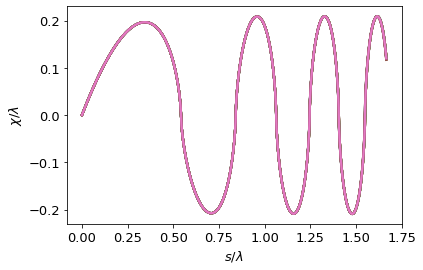

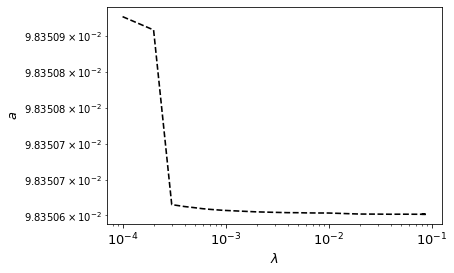

In [18]:
# Radiation Domination Case.

# Solution of eq.(9) for PBH binaries without DM halos given in paper "The merger rate of primordial-black-hole 
# binaries".

import numpy as np
from scipy.integrate import odeint
import math
import matplotlib.pyplot as plt


π=np.pi
t_eq=1.59246e12       # in units of seconds
rho_eq=2.15368e-16    # in units of kg.m^-3
G=6.67e-11            # in units of m^3.kg^-1.s^-2
a_eq=2.9374e-4        # scale factor corresponding to matter radiation equlaity


λ_1_list=[0.0001,0.0002,0.0003,0.0004,0.0005,0.0006,0.0007,0.0008,0.0009,0.001,0.002,0.003,0.004,
          0.005,0.006,0.007,0.008,0.009,0.01,0.02,0.03,0.04,0.05,0.06,0.07,0.09,0.08]



def a(λ_0):    
    def f(u,s,λ_0):
        return  [u[1], ((s*u[1]-u[0])/(s**2))-((u[0]*(s**2))/(λ_0*((u[0]**2+b**2)**(3/2))))]
    separation0= [1e-12,1]
    b=((2*λ_0)/10000)
    ss= np.linspace(1e-12,((5*λ_0)/3),1000000) 
    us= odeint(f,separation0,ss,args=( λ_0,))
    separations= us[:,0]
    As=ss/λ_0
    Bs=separations/λ_0
    plt.xticks(fontsize=13) 
    plt.yticks(fontsize=13)
    plt.plot(As,Bs,'')
    plt.xlabel('$s/λ$',fontsize=13)
    plt.ylabel('$χ/λ$',fontsize=13)
    Bs_list = Bs.tolist()
    As_list = As.tolist()
    for i in  range(1,len(Bs_list)):
        Δ=(Bs[i] - Bs[i-1])
        A=Bs[i]
        if Δ<0:
            a=A/2
            break
        
    return a
    



a_1_list=np.zeros(len(λ_1_list))
for i, λ_0 in enumerate(λ_1_list):
        a_1_list[i] = (a(λ_0))
print("semi-major axis,a=",a_1_list)          
 
    
    

plt.rc('lines',linewidth=1.6)
plt.figure(figsize=(6,4))    
plt.xticks(fontsize=13) 
plt.yticks(fontsize=13)


plt.loglog(λ_1_list,a_1_list,'k--')
plt.xlabel('$λ$',fontsize=13)
plt.ylabel('$a$',fontsize=13)
      
plt.show()   

semi-major axis,a= [0.09835008 0.09834947 0.09834885 0.09834824 0.09834821 0.0983476
 0.09834698 0.09834637 0.09834576 0.09834514 0.09833901 0.09833288
 0.09832675 0.09832062 0.09831449 0.09830837 0.09830225 0.09829612
 0.09829    0.0982289  0.09816792 0.09810719 0.09804656 0.09798613
 0.09792587 0.09780585 0.09786578]


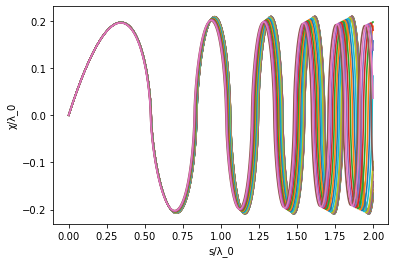

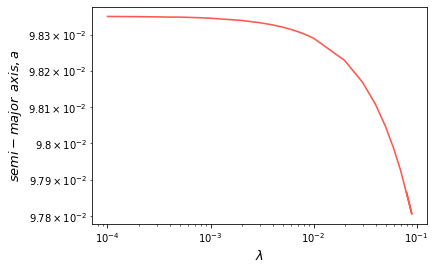

In [20]:
# Solution of eq.(9) for PBH binaries with DM halos given in paper "The merger rate of primordial-black-hole 
# binaries".


def M_r_halo(s):    #Mass of the DM halo given by eq.(11) in reference pdf "M_DM at s_dec".
    return ((((8*π*G*rho_eq*(t_eq**2))/3)**(3/4))*M_PBH*(2**(3/4))*s)




def n_r(s):
    return (1+((((8*π*G*rho_eq*(t_eq**2))/3)**(3/4))*(2**(3/4))*s)) 
def  k_r(s):
    return (1/n_r(s))
def λ_r(s):
    return λ_0*k_r(s)



def a(λ_0):
    def f(u,s,λ_0):
        return [u[1], ((s*u[1]-u[0])/(s**2))-((u[0]*(s**2))/(λ_r(s)*((u[0]**2+b**2)**(3/2))))]   #eq.(8) in reference pdf "M_DM at s_dec".
    separation0= [1e-12,1]
    b=((2*λ_0)/10000)
    ss= np.linspace(1e-12,((6*λ_0)/3),1000000) 
    us= odeint(f,separation0,ss,args=( λ_0,))
    separations= us[:,0]
    As=ss/λ_0
    Bs=separations/λ_0
    plt.plot(As,Bs,'')
    plt.xlabel('s/λ_0')
    plt.ylabel('χ/λ_0')
    Bs_list = Bs.tolist()
    As_list = As.tolist()
    for i in  range(1,len(Bs_list)):
        Δ=(Bs[i] - Bs[i-1])
        A=Bs[i]
        if Δ<0:
            a=A/2
            break
        
    return a
    
a_2_list=np.zeros(len(λ_1_list))
for k, λ_0 in enumerate(λ_1_list):
    a_2_list[k] = a(λ_0)
print("semi-major axis,a=",a_2_list)      
 



plt.figure(figsize=(6,4))    
plt.loglog(λ_1_list,a_2_list,'#FC5A50')
plt.xlabel('$λ$',fontsize=13)
plt.ylabel('$semi-major \hspace{0.5} axis,a$',fontsize=13)
plt.show()               

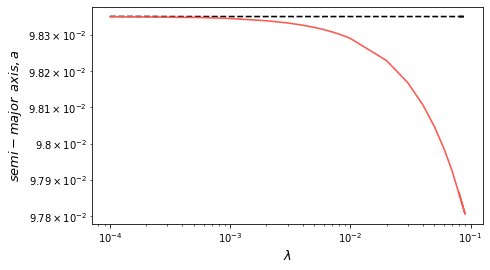

In [22]:
# Solution of eq.(9) for PBH binaries with and without DM halos given in paper 
# "The merger rate of primordial-black-hole binaries".

# Radiation domination case.


plt.figure(figsize=(7,4))
plt.loglog(λ_1_list,a_1_list,'k--')
plt.loglog(λ_1_list,a_2_list,'#FC5A50')
plt.xlabel('$λ$',fontsize=13)
plt.ylabel('$semi-major \hspace{0.5} axis,a$',fontsize=13)
plt.show() 

a= [0.11096599 0.1185623  0.12682515 0.1358113  0.14558231 0.15620483
 0.16775117]


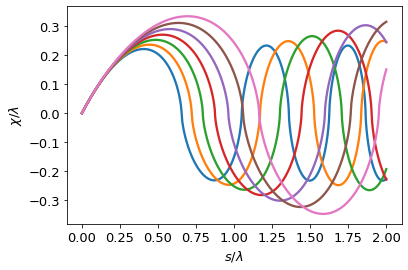

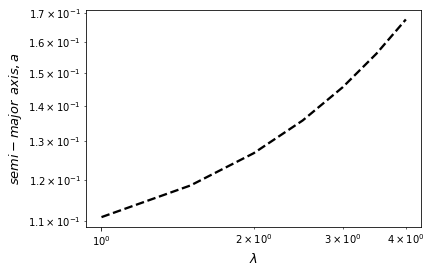

In [36]:
# For PBH binaries decoupling around matter-radiation equality.


# Solution of eq.(6) for PBH binaries without DM halos given in paper "The merger rate of primordial-black-hole 
# binaries".



def h(s):
    return math.sqrt((s**-3)+(s**-4)) 

def g(s):
    return  -((3*s+4)/(2*h(s)*(s**5))) #g(s)=h'(s).

   

λ_2_list=[1.0,1.5,2.0,2.5,3.0,3.5,4.0]
a_3_list=np.zeros(len(λ_2_list))


    


def a(λ_0):
    def f(u,s,λ_0):
        return [u[1], -((s*g(s)+h(s))*((s*u[1]-u[0]))/(h(s)*s**2))-((u[0])/((((h(s)*s)**2))*λ_0
                     *((u[0]**2+b**2)**(3/2))))]    
    separation0= [1e-12,1]
    b=(3*λ_0)/100000
    ss= np.linspace(1e-12,((6*λ_0)/3),1000000) 
    us= odeint(f,separation0,ss,args=( λ_0,))
    separations= us[:,0]
    As=ss/λ_0
    Bs=separations/λ_0
    plt.xticks(fontsize=13) 
    plt.yticks(fontsize=13)
    plt.plot(As,Bs,'')
    plt.xlabel('$s/λ$',fontsize=13)
    plt.ylabel('$χ/λ$',fontsize=13)
    Bs_list = Bs.tolist()
    As_list = As.tolist()
    for i in  range(1,len(Bs_list)):
        Δ=(Bs[i] - Bs[i-1])
        A=Bs[i]
        if Δ<0:
            a=A/2
            break
        
    return a
    
for k, λ_0 in enumerate(λ_2_list):
    a_3_list[k] = a(λ_0)
print("a=",a_3_list)

plt.figure(figsize=(6,4))    
plt.loglog(λ_2_list,a_3_list,'k--')
plt.xlabel('$λ$',fontsize=13)
plt.ylabel('$semi-major \hspace{0.5} axis,a$',fontsize=13)
plt.show()   

a= [0.10365812 0.10658589 0.10943883 0.11222029 0.1149335  0.11758198
 0.12016906]


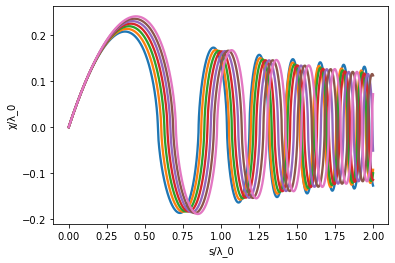

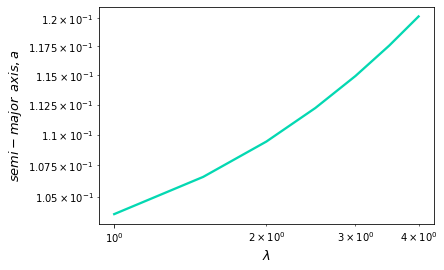

In [37]:
# For PBH binaries decoupling around matter-radiation equality.


# Solution of eq.(6) for PBH binaries with DM halos given in paper "The merger rate of primordial-black-hole 
# binaries".



def M_halo(s):               #eq.(4) in reference pdf "M_DM at s_dec".
    return (((8*π*G*rho_eq*(t_eq**(2)))/3)**(3/4))*(2**(5/4))*M_PBH* math.sqrt((((2/3)*(s-2)
                                *math.sqrt(s+1))+(4/3)))




def n_mr(s):
    return (1+(((8*π*G*rho_eq*(t_eq**(2)))/3)**(3/4))*(2**(5/4))* math.sqrt((((2/3)*(s-2)*math.sqrt(s+1))+(4/3))))
                   
def  k_mr(s):
    return (1/n_mr(s))

def λ_mr(s):
    return λ_0*k_mr(s)
   


def a_(λ_0):
    def f(u,s,λ_0):
            return [u[1], -((s*g(s)+h(s))*((s*u[1]-u[0]))/(h(s)*s**2))-((u[0])/((((h(s)*s)**2))*λ_mr(s)
                     *((u[0]**2+b**2)**(3/2))))]    #eq.(1) in reference pdf "M_DM at s_dec".
    separation0= [1e-12,1]
    b= (3*λ_0)/100000
    ss= np.linspace(1e-12,((6*λ_0)/3),1000000) 
    us= odeint(f,separation0,ss,args=(λ_0,))
    separations= us[:,0]
    As=ss/λ_0
    Bs=separations/λ_0
    plt.plot(As,Bs,'')
    plt.xlabel('s/λ_0')
    plt.ylabel('χ/λ_0')
    Bs_list = Bs.tolist()
    As_list = As.tolist()
    for i in  range(1,len(Bs_list)):
        Δ=(Bs[i] - Bs[i-1])
        A=Bs[i]
        if Δ<0:
            a=A/2
            break
        
    return a
    
a_4_list=np.zeros(len(λ_2_list))
for k, λ_0 in enumerate(λ_2_list):
    a_4_list[k] = a_(λ_0)
print("a=",a_4_list)      
 



plt.figure(figsize=(6,4))    
plt.loglog(λ_2_list,a_4_list,'#04D8B2')
plt.xlabel('$λ$',fontsize=13)
plt.ylabel('$semi-major \hspace{0.5} axis,a$',fontsize=13)
plt.show() 

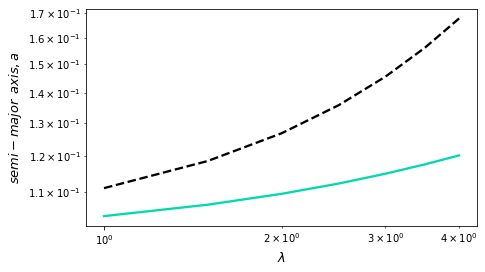

In [38]:
# For PBH binaries decoupling around matter-radiation equality.


# Solution of eq.(9) for PBH binaries with and without DM halos given in paper 
# "The merger rate of primordial-black-hole binaries".

plt.figure(figsize=(7,4))
plt.loglog(λ_2_list,a_3_list,'k--')
plt.loglog(λ_2_list,a_4_list,'#04D8B2')
plt.xlabel('$λ$',fontsize=13)
plt.ylabel('$semi-major \hspace{0.5} axis,a$',fontsize=13)
plt.show()   

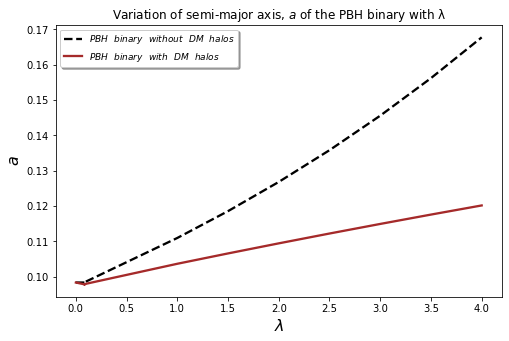

In [34]:
λ_list = λ_1_list+λ_2_list
a = np.append(a_1_list,a_3_list)
a_halo=np.append(a_2_list,a_4_list)
plt.figure(figsize=(8,5))
plt.plot(λ_list,a,'k--')
plt.plot(λ_list,a_halo,'#A52A2A')
plt.xlabel('$λ$',fontsize=16)
plt.ylabel('$a$',fontsize=16)
plt.legend(['$PBH\hspace{0.7} binary\hspace{0.7} without\hspace{0.7} DM\hspace{0.7} halos$','$PBH\hspace{0.7} binary\hspace{0.7} with\hspace{0.7} DM\hspace{0.7} halos$'],prop = {'size' :9},
              loc='upper left',shadow = True,
               facecolor = 'white',fontsize=16)        
plt.title('Variation of semi-major axis, $a$ of the PBH binary with λ')
plt.show()

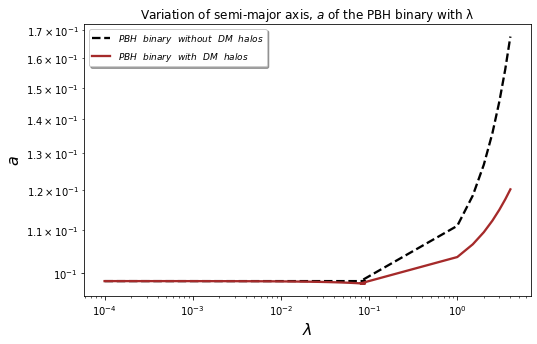

In [35]:
#Variation of  semi-major axis, a with $\lambda$ for the PBH binaries with and without DM halos decoupling 
# in radiation domination to upto matter-radiation equality.



λ_list = λ_1_list+λ_2_list
a = np.append(a_1_list,a_3_list)
a_halo=np.append(a_2_list,a_4_list)
plt.figure(figsize=(8,5))
plt.loglog(λ_list,a,'k--')
plt.loglog(λ_list,a_halo,'#A52A2A')
plt.xlabel('$λ$',fontsize=16)
plt.ylabel('$a$',fontsize=16)
plt.legend(['$PBH\hspace{0.7} binary\hspace{0.7} without\hspace{0.7} DM\hspace{0.7} halos$','$PBH\hspace{0.7} binary\hspace{0.7} with\hspace{0.7} DM\hspace{0.7} halos$'],prop = {'size' :9},
              loc='upper left',shadow = True,
               facecolor = 'white',fontsize=16)        
plt.title('Variation of semi-major axis, $a$ of the PBH binary with λ')
plt.show()